# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF1 = pd.read_csv('creditcard.csv')

## 2. Data Exploration

In [3]:
DF1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
DF1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data Pre-processing

In [5]:
from sklearn.preprocessing import StandardScaler
DF2= DF1.copy()

SC = StandardScaler()

DF2['Normalize_Amount'] = SC.fit_transform(DF1['Amount'].values.reshape(-1,1))

DF2 = DF2.drop(columns = ['Amount'])

In [6]:
DF2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalize_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
DF2 = DF2.drop(columns=['Time'])

## 3. Splotting the dataset

In [8]:
X = DF2.drop(columns= 'Class')
y = DF2['Class']

# OR

# X = DF2.iloc[:, DF2.columns != 'Class']
# y = DF2.iloc[:, DF2.columns == 'Class']

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train.shape

(190820, 29)

In [11]:
X_test.shape

(93987, 29)

In [12]:
y_train.shape

(190820,)

# 1. ANN

In [13]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [14]:
model = Sequential()
model.add(Dense(units = 10, input_dim = 29, activation = 'relu'))
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 60, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Binary output

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3

In [16]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics='accuracy')

In [17]:
epochs_hist = model.fit(x = X_train, y = y_train, epochs = 10, batch_size = 50, verbose = 1, validation_split = 0.33)

Epoch 1/10
2557/2557 [==============================] - 11s 4ms/step - loss: 0.0154 - accuracy: 0.9976 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/10
2557/2557 [==============================] - 10s 4ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 3/10
2557/2557 [==============================] - 10s 4ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 4/10
2557/2557 [==============================] - 10s 4ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/10
2557/2557 [==============================] - 10s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/10
2557/2557 [==============================] - 11s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/10
2557/2557 [==============================] - 10s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0039 - val_ac

In [18]:
score = model.evaluate(X_test, y_test)

2938/2938 [==============================] - 6s 2ms/step - loss: 0.0035 - accuracy: 0.9993


In [19]:
print('accuracy : ' + str(round(score[1]*100, 2)))

accuracy : 99.93


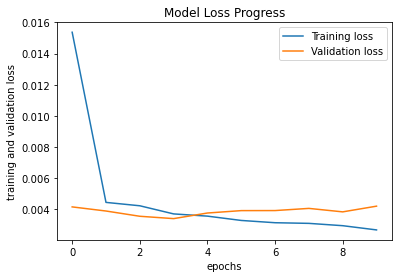

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('training and validation loss')
plt.xlabel('epochs')
plt.legend(['Training loss', 'Validation loss'])

In [21]:
y_pred = (model.predict(X_test)).round()

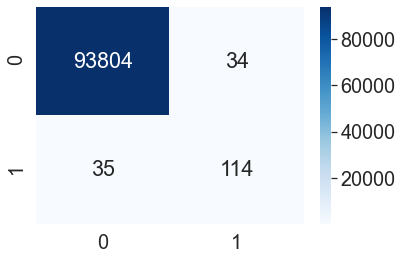

In [23]:
# RESULTS

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

CM = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.8)
sns.heatmap(CM, annot = True, fmt='d', cmap='Blues');      # or fmt='g' from not showing scintific values

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

accuracy        = accuracy_score(y_test,y_pred)
precision_score =  precision_score(y_test,y_pred)
f1_score        =  f1_score(y_test,y_pred)
recall_score    =  recall_score(y_test,y_pred)


results = pd.DataFrame([['ANN', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,ANN,99.93,0.77027,0.767677,0.765101,0.027095


# 2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
Classifier = RandomForestClassifier(n_estimators = 1000, random_state= 42)
Classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=1000, random_state=42)

In [27]:
y_pred_RF = Classifier.predict(X_test)

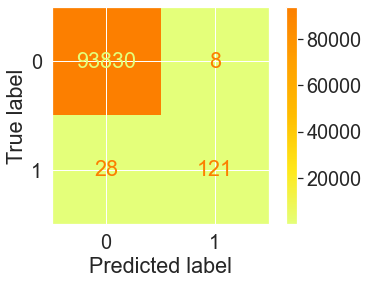

In [36]:
# RESULTS

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Classifier, X_test, y_test, cmap = 'Wistia')  # doctest: +SKIP
# plt.show()  # doctest: +SKIP

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred_RF))


accuracy        = accuracy_score(y_test,y_pred_RF)
precision_score =  precision_score(y_test,y_pred_RF)
f1_score        =  f1_score(y_test,y_pred_RF)
recall_score    =  recall_score(y_test,y_pred_RF)


model_results = pd.DataFrame([['Random Forest(n=1000)', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,ANN,99.93,0.770270,0.767677,0.765101,0.027095
1,Random Forest(n=1000),99.96,0.937984,0.870504,0.812081,0.019571


# 3. Decisoin Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state= 42)

In [31]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred_DT = decision_tree.predict(X_test)

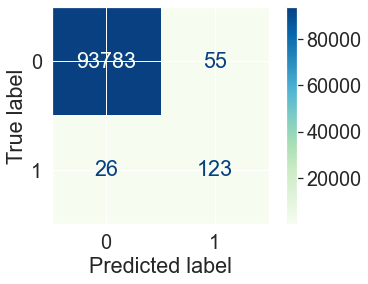

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_DT))

# RESULTS

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree, X_test, y_test, cmap = 'GnBu')  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [46]:
accuracy        = accuracy_score(y_test,y_pred_DT)
precision_score =  precision_score(y_test,y_pred_DT)
f1_score        =  f1_score(y_test,y_pred_DT)
recall_score    =  recall_score(y_test,y_pred_DT)

model_results = pd.DataFrame([['Decision_Tree', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,ANN,99.93,0.770270,0.767677,0.765101,0.027095
1,Random Forest(n=1000),99.96,0.937984,0.870504,0.812081,0.019571
2,Decision_Tree,99.91,0.691011,0.752294,0.825503,0.029357


In [35]:
# Over real Data
Ypred = decision_tree.predict(X)

accuracy_score(y, Ypred)

0.9997155968778857